In [1550]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [1551]:
df= pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [1552]:
df["BMI Category"]= df["BMI Category"].replace("Normal Weight", "Underweigh")
df["BMI Category"]

0      Overweight
1          Normal
2          Normal
3           Obese
4           Obese
          ...    
369    Overweight
370    Overweight
371    Overweight
372    Overweight
373    Overweight
Name: BMI Category, Length: 374, dtype: object

In [1553]:
df.isna().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [1554]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [1555]:
df["Sleep Disorder"]=df["Sleep Disorder"].fillna("none")
df["Sleep Disorder"]

0             none
1             none
2             none
3      Sleep Apnea
4      Sleep Apnea
          ...     
369    Sleep Apnea
370    Sleep Apnea
371    Sleep Apnea
372    Sleep Apnea
373    Sleep Apnea
Name: Sleep Disorder, Length: 374, dtype: object

In [1556]:
df[["Systolic", "Diastolic"]]= df["Blood Pressure"].str.split('/', expand=True).astype(int)

In [1557]:
Gender_count= df["Gender"].value_counts().reset_index()
Gender_count

,Gender,count
0,Male,189
1,Female,185


In [1558]:
Age_mean= df.groupby("Gender")["Age"].mean().reset_index()
Age_mean

,Gender,Age
0,Female,47.405405
1,Male,37.074074


In [1559]:
df["Occupation"].unique()

array(['Software Engineer', 'Doctor', 'Sales Representative', 'Teacher',
       'Nurse', 'Engineer', 'Accountant', 'Scientist', 'Lawyer',
       'Salesperson', 'Manager'], dtype=object)

In [1560]:
occ_count= pd.crosstab(df["Occupation"], df["Gender"])
occ_count

Gender,Female,Male
Occupation,,
Accountant,36,1
Doctor,2,69
Engineer,32,31
Lawyer,2,45
Manager,1,0
Nurse,73,0
Sales Representative,0,2
Salesperson,0,32
Scientist,4,0


In [1561]:
 df.groupby("Occupation")["Sleep Duration"].mean().reset_index()

,Occupation,Sleep Duration
0,Accountant,7.113514
1,Doctor,6.970423
2,Engineer,7.987302
3,Lawyer,7.410638
4,Manager,6.900000
5,Nurse,7.063014
6,Sales Representative,5.900000
7,Salesperson,6.403125
8,Scientist,6.000000
9,Software Engineer,6.750000


In [1562]:
df.groupby(["Gender", "Occupation"])["Sleep Duration"].mean()

Gender  Occupation          
Female  Accountant              7.111111
        Doctor                  8.200000
        Engineer                8.425000
        Lawyer                  7.150000
        Manager                 6.900000
        Nurse                   7.063014
        Scientist               6.000000
        Teacher                 6.705714
Male    Accountant              7.200000
        Doctor                  6.934783
        Engineer                7.535484
        Lawyer                  7.422222
        Sales Representative    5.900000
        Salesperson             6.403125
        Software Engineer       6.750000
        Teacher                 6.580000
Name: Sleep Duration, dtype: float64

In [1563]:
pd.pivot_table(df, index="Occupation", columns="Gender", values="Sleep Duration", aggfunc="mean")

Gender,Female,Male
Occupation,,
Accountant,7.111111,7.200000
Doctor,8.200000,6.934783
Engineer,8.425000,7.535484
Lawyer,7.150000,7.422222
Manager,6.900000,NaN
Nurse,7.063014,NaN
Sales Representative,NaN,5.900000
Salesperson,NaN,6.403125
Scientist,6.000000,NaN


In [1564]:
pd.crosstab(df["Occupation"], df["Gender"])

Gender,Female,Male
Occupation,,
Accountant,36,1
Doctor,2,69
Engineer,32,31
Lawyer,2,45
Manager,1,0
Nurse,73,0
Sales Representative,0,2
Salesperson,0,32
Scientist,4,0


In [1565]:
df.groupby("Occupation")["Quality of Sleep"].mean().reset_index()

,Occupation,Quality of Sleep
0,Accountant,7.891892
1,Doctor,6.647887
2,Engineer,8.412698
3,Lawyer,7.893617
4,Manager,7.000000
5,Nurse,7.369863
6,Sales Representative,4.000000
7,Salesperson,6.000000
8,Scientist,5.000000
9,Software Engineer,6.500000


In [1566]:
df.groupby(["Gender", "Occupation"])["Quality of Sleep"].mean()

Gender  Occupation          
Female  Accountant              7.888889
        Doctor                  9.000000
        Engineer                9.000000
        Lawyer                  7.000000
        Manager                 7.000000
        Nurse                   7.369863
        Scientist               5.000000
        Teacher                 7.114286
Male    Accountant              8.000000
        Doctor                  6.579710
        Engineer                7.806452
        Lawyer                  7.933333
        Sales Representative    4.000000
        Salesperson             6.000000
        Software Engineer       6.500000
        Teacher                 6.000000
Name: Quality of Sleep, dtype: float64

In [1567]:
pd.pivot_table(df, index="Occupation", columns="Gender", values="Quality of Sleep", aggfunc="mean")

Gender,Female,Male
Occupation,,
Accountant,7.888889,8.000000
Doctor,9.000000,6.579710
Engineer,9.000000,7.806452
Lawyer,7.000000,7.933333
Manager,7.000000,NaN
Nurse,7.369863,NaN
Sales Representative,NaN,4.000000
Salesperson,NaN,6.000000
Scientist,5.000000,NaN


In [1568]:
df["Physical Activity Level"].unique()

array([42, 60, 30, 40, 75, 35, 45, 50, 32, 70, 80, 55, 90, 47, 65, 85],
      dtype=int64)

In [1569]:
# The number of minutes the person engages in physical activity daily
df.groupby("Occupation")["Physical Activity Level"].mean().reset_index()

,Occupation,Physical Activity Level
0,Accountant,58.108108
1,Doctor,55.352113
2,Engineer,51.857143
3,Lawyer,70.425532
4,Manager,55.000000
5,Nurse,78.589041
6,Sales Representative,30.000000
7,Salesperson,45.000000
8,Scientist,41.000000
9,Software Engineer,48.000000


In [1570]:
# The number of minutes the person engages in physical activity daily
df.groupby(["Gender", "Occupation"])["Physical Activity Level"].mean()

Gender  Occupation          
Female  Accountant              58.333333
        Doctor                  90.000000
        Engineer                30.000000
        Lawyer                  55.000000
        Manager                 55.000000
        Nurse                   78.589041
        Scientist               41.000000
        Teacher                 46.714286
Male    Accountant              50.000000
        Doctor                  54.347826
        Engineer                74.419355
        Lawyer                  71.111111
        Sales Representative    30.000000
        Salesperson             45.000000
        Software Engineer       48.000000
        Teacher                 38.000000
Name: Physical Activity Level, dtype: float64

In [1571]:
# The number of minutes the person engages in physical activity daily
pd.pivot_table(df, index="Occupation", columns="Gender", values="Physical Activity Level", aggfunc="mean")

Gender,Female,Male
Occupation,,
Accountant,58.333333,50.000000
Doctor,90.000000,54.347826
Engineer,30.000000,74.419355
Lawyer,55.000000,71.111111
Manager,55.000000,NaN
Nurse,78.589041,NaN
Sales Representative,NaN,30.000000
Salesperson,NaN,45.000000
Scientist,41.000000,NaN


In [1572]:
df["Stress Level"].unique()

array([6, 8, 7, 4, 3, 5], dtype=int64)

In [1573]:
df.groupby("Occupation")["Stress Level"].mean().sort_values()

Occupation
Engineer                3.888889
Teacher                 4.525000
Accountant              4.594595
Manager                 5.000000
Lawyer                  5.063830
Nurse                   5.547945
Software Engineer       6.000000
Doctor                  6.732394
Salesperson             7.000000
Scientist               7.000000
Sales Representative    8.000000
Name: Stress Level, dtype: float64

In [1574]:
df.groupby(["Gender", "Occupation"])["Stress Level"].mean()

Gender  Occupation          
Female  Accountant              4.555556
        Doctor                  3.000000
        Engineer                3.000000
        Lawyer                  5.500000
        Manager                 5.000000
        Nurse                   5.547945
        Scientist               7.000000
        Teacher                 4.285714
Male    Accountant              6.000000
        Doctor                  6.840580
        Engineer                4.806452
        Lawyer                  5.044444
        Sales Representative    8.000000
        Salesperson             7.000000
        Software Engineer       6.000000
        Teacher                 6.200000
Name: Stress Level, dtype: float64

In [1575]:
pd.pivot_table(df, index= "Occupation", columns= "Gender", values="Stress Level", aggfunc="mean")

Gender,Female,Male
Occupation,,
Accountant,4.555556,6.000000
Doctor,3.000000,6.840580
Engineer,3.000000,4.806452
Lawyer,5.500000,5.044444
Manager,5.000000,NaN
Nurse,5.547945,NaN
Sales Representative,NaN,8.000000
Salesperson,NaN,7.000000
Scientist,7.000000,NaN


In [1576]:
df["BMI Category"].value_counts()

BMI Category
Normal        195
Overweight    148
Underweigh     21
Obese          10
Name: count, dtype: int64

In [1577]:
pd.crosstab(df["Gender"], df["BMI Category"])

BMI Category,Normal,Obese,Overweight,Underweigh
Gender,,,,
Female,64,1,106,14
Male,131,9,42,7


In [1578]:
pd.crosstab(df["Occupation"], df["BMI Category"])

BMI Category,Normal,Obese,Overweight,Underweigh
Occupation,,,,
Accountant,26,0,6,5
Doctor,65,4,0,2
Engineer,56,0,3,4
Lawyer,42,2,2,1
Manager,0,0,1,0
Nurse,0,0,66,7
Sales Representative,0,2,0,0
Salesperson,0,0,32,0
Scientist,0,0,4,0


In [1579]:
df.groupby("BMI Category")["Quality of Sleep"].mean()

BMI Category
Normal        7.661538
Obese         6.400000
Overweight    6.898649
Underweigh    7.428571
Name: Quality of Sleep, dtype: float64

In [1580]:
df.groupby("BMI Category")["Sleep Duration"].mean()

BMI Category
Normal        7.393846
Obese         6.960000
Overweight    6.770270
Underweigh    7.333333
Name: Sleep Duration, dtype: float64

In [1581]:
df.groupby(["Gender", "BMI Category"])["Age"].mean()

Gender  BMI Category
Female  Normal          44.828125
        Obese           38.000000
        Overweight      50.160377
        Underweigh      39.000000
Male    Normal          35.381679
        Obese           38.000000
        Overweight      42.142857
        Underweigh      37.142857
Name: Age, dtype: float64

In [1582]:
pd.pivot_table(df, index="BMI Category", columns="Gender", values="Age", aggfunc="mean")

Gender,Female,Male
BMI Category,,
Normal,44.828125,35.381679
Obese,38.000000,38.000000
Overweight,50.160377,42.142857
Underweigh,39.000000,37.142857


In [1583]:
pd.pivot_table(df, index="Occupation", columns="BMI Category", values="Stress Level", aggfunc="mean")

BMI Category,Normal,Obese,Overweight,Underweigh
Occupation,,,,
Accountant,4.000000,NaN,7.000000,4.80
Doctor,7.015385,4.0,NaN,3.00
Engineer,3.678571,NaN,6.000000,5.25
Lawyer,5.000000,5.0,6.000000,6.00
Manager,NaN,NaN,5.000000,NaN
Nurse,NaN,NaN,5.500000,6.00
Sales Representative,NaN,8.0,NaN,NaN
Salesperson,NaN,NaN,7.000000,NaN
Scientist,NaN,NaN,7.000000,NaN


In [1584]:
pd.pivot_table(df, index="BMI Category", columns="Gender", values="Stress Level", aggfunc="mean")

Gender,Female,Male
BMI Category,,
Normal,3.500000,5.923664
Obese,5.000000,5.777778
Overweight,5.320755,6.761905
Underweigh,5.142857,5.285714


In [1585]:
pd.pivot_table(df, index="BMI Category", columns="Gender", values="Physical Activity Level", aggfunc="mean")

Gender,Female,Male
BMI Category,,
Normal,45.000000,63.893130
Obese,60.000000,54.444444
Overweight,67.556604,45.285714
Underweigh,60.000000,61.000000


In [1586]:
pd.pivot_table(df, index="Occupation", columns="BMI Category", values="Physical Activity Level", aggfunc="mean")

BMI Category,Normal,Obese,Overweight,Underweigh
Occupation,,,,
Accountant,60.000000,NaN,45.000000,64.000000
Doctor,53.076923,75.0,NaN,90.000000
Engineer,50.892857,NaN,53.333333,64.250000
Lawyer,72.142857,60.0,55.000000,50.000000
Manager,NaN,NaN,55.000000,NaN
Nurse,NaN,NaN,81.772727,48.571429
Sales Representative,NaN,30.0,NaN,NaN
Salesperson,NaN,NaN,45.000000,NaN
Scientist,NaN,NaN,41.000000,NaN


In [1587]:
df.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder', 'Systolic', 'Diastolic'],
      dtype='object')

In [1588]:
df.groupby("BMI Category")[["Systolic", "Diastolic"]].mean()

,Systolic,Diastolic
BMI Category,,
Normal,123.820513,80.666667
Obese,139.200000,90.200000
Overweight,135.054054,90.182432
Underweigh,121.619048,80.000000


In [1589]:
df.groupby(["BMI Category", "Gender"])[["Systolic", "Diastolic"]].mean()

Systolic  Diastolic
BMI Category Gender                       
Normal       Female  120.000000  77.500000
             Male    125.687023  82.213740
Obese        Female  135.000000  88.000000
             Male    139.666667  90.444444
Overweight   Female  137.301887  92.377358
             Male    129.380952  84.642857
Underweigh   Female  122.714286  80.642857
             Male    119.428571  78.714286

In [1590]:
df.groupby("Gender")[["Systolic", "Diastolic"]].mean()

,Systolic,Diastolic
Gender,,
Female,130.200000,86.318919
Male,126.941799,83.015873


In [1591]:
df.groupby("Occupation")[["Systolic", "Diastolic"]].mean()

,Systolic,Diastolic
Occupation,,
Accountant,117.729730,76.918919
Doctor,123.000000,80.507042
Engineer,125.904762,81.380952
Lawyer,129.957447,85.000000
Manager,125.000000,82.000000
Nurse,138.520548,93.726027
Sales Representative,140.000000,90.000000
Salesperson,130.000000,85.000000
Scientist,129.500000,85.500000


In [1592]:
df.groupby(["Gender", "BMI Category", "Occupation"])[["Systolic", "Diastolic"]].mean()

Systolic  Diastolic
Gender BMI Category Occupation                                 
Female Normal       Accountant            115.000000  75.000000
                    Engineer              125.000000  80.000000
                    Teacher               115.000000  75.000000
       Obese        Lawyer                135.000000  88.000000
       Overweight   Accountant            130.000000  85.000000
                    Manager               125.000000  82.000000
                    Nurse                 139.787879  94.818182
                    Scientist             129.500000  85.500000
                    Teacher               134.655172  89.655172
       Underweigh   Accountant            117.000000  77.500000
                    Doctor                118.000000  75.000000
                    Lawyer                128.000000  85.000000
                    Nurse                 126.571429  83.428571
Male   Normal       Doctor                122.076923  80.000000
                    Engineer              127.916667  83.333333
                    Lawyer                130.000000  85.000000
       Obese        Doctor                140.500000  91.500000
                    Lawyer                135.000000  88.000000
                    Sales Representative  140.000000  90.000000
                    Software Engineer     140.000000  90.000000
                    Teacher               140.000000  90.000000
       Overweight   Engineer              128.000000  84.000000
                    Lawyer                125.000000  82.000000
                    Salesperson           130.000000  85.000000
                    Software Engineer     126.000000  83.000000
                    Teacher               128.500000  84.000000
       Underweigh   Accountant            118.000000  76.000000
                    Engineer              119.500000  78.750000
                    Software Engineer     120.000000  80.000000

In [1593]:
df.groupby(["BMI Category", "Occupation"])[["Systolic", "Diastolic"]].mean()

Systolic  Diastolic
BMI Category Occupation                                 
Normal       Accountant            115.000000  75.000000
             Doctor                122.076923  80.000000
             Engineer              126.250000  81.428571
             Lawyer                130.000000  85.000000
             Teacher               115.000000  75.000000
Obese        Doctor                140.500000  91.500000
             Lawyer                135.000000  88.000000
             Sales Representative  140.000000  90.000000
             Software Engineer     140.000000  90.000000
             Teacher               140.000000  90.000000
Overweight   Accountant            130.000000  85.000000
             Engineer              128.000000  84.000000
             Lawyer                125.000000  82.000000
             Manager               125.000000  82.000000
             Nurse                 139.787879  94.818182
             Salesperson           130.000000  85.000000
             Scientist             129.500000  85.500000
             Software Engineer     126.000000  83.000000
             Teacher               133.909091  88.969697
Underweigh   Accountant            117.200000  77.200000
             Doctor                118.000000  75.000000
             Engineer              119.500000  78.750000
             Lawyer                128.000000  85.000000
             Nurse                 126.571429  83.428571
             Software Engineer     120.000000  80.000000

In [1594]:
df.groupby("BMI Category")["Heart Rate"].mean().reset_index()

,BMI Category,Heart Rate
0,Normal,68.728205
1,Obese,84.300000
2,Overweight,70.945946
3,Underweigh,71.285714


In [1595]:
df.groupby("BMI Category").agg({"Heart Rate":"mean", "Systolic":"mean", "Diastolic":"mean"})

,Heart Rate,Systolic,Diastolic
BMI Category,,,
Normal,68.728205,123.820513,80.666667
Obese,84.300000,139.200000,90.200000
Overweight,70.945946,135.054054,90.182432
Underweigh,71.285714,121.619048,80.000000


In [1596]:
pd.pivot_table(df, index= "BMI Category", values=["Heart Rate", "Systolic", "Diastolic"], aggfunc= "mean")

,Diastolic,Heart Rate,Systolic
BMI Category,,,
Normal,80.666667,68.728205,123.820513
Obese,90.200000,84.300000,139.200000
Overweight,90.182432,70.945946,135.054054
Underweigh,80.000000,71.285714,121.619048


In [1597]:
pd.pivot_table(df, index= "Gender", values=["Heart Rate", "Systolic", "Diastolic"], aggfunc= "mean")

,Diastolic,Heart Rate,Systolic
Gender,,,
Female,86.318919,69.259459,130.200000
Male,83.015873,71.052910,126.941799


In [1598]:
df.groupby(["Gender", "Occupation"]).agg({ "Age":"mean", "Heart Rate":"mean", "Stress Level":"mean"})

Age  Heart Rate  Stress Level
Gender Occupation                                               
Female Accountant            39.833333   68.888889      4.555556
       Doctor                56.000000   65.000000      3.000000
       Engineer              52.781250   65.000000      3.000000
       Lawyer                38.500000   79.500000      5.500000
       Manager               45.000000   75.000000      5.000000
       Nurse                 51.794521   72.000000      5.547945
       Scientist             33.500000   78.500000      7.000000
       Teacher               42.800000   66.257143      4.285714
Male   Accountant            32.000000   68.000000      6.000000
       Doctor                32.000000   71.710145      6.840580
       Engineer              40.193548   69.451613      4.806452
       Lawyer                39.466667   69.200000      5.044444
       Sales Representative  28.000000   85.000000      8.000000
       Salesperson           43.531250   72.000000      7.000000
       Software Engineer     31.250000   75.500000      6.000000
       Teacher               34.200000   74.000000      6.200000

In [1599]:
df.groupby("Occupation").agg({ "Age":"mean", "Heart Rate":"mean", "Stress Level":"mean"})

,Age,Heart Rate,Stress Level
Occupation,,,
Accountant,39.621622,68.864865,4.594595
Doctor,32.676056,71.521127,6.732394
Engineer,46.587302,67.190476,3.888889
Lawyer,39.425532,69.638298,5.063830
Manager,45.000000,75.000000,5.000000
Nurse,51.794521,72.000000,5.547945
Sales Representative,28.000000,85.000000,8.000000
Salesperson,43.531250,72.000000,7.000000
Scientist,33.500000,78.500000,7.000000


In [1600]:
pd.pivot_table(df, index= "Occupation", values=["Heart Rate", "Systolic", "Diastolic"], aggfunc= "mean")

,Diastolic,Heart Rate,Systolic
Occupation,,,
Accountant,76.918919,68.864865,117.729730
Doctor,80.507042,71.521127,123.000000
Engineer,81.380952,67.190476,125.904762
Lawyer,85.000000,69.638298,129.957447
Manager,82.000000,75.000000,125.000000
Nurse,93.726027,72.000000,138.520548
Sales Representative,90.000000,85.000000,140.000000
Salesperson,85.000000,72.000000,130.000000
Scientist,85.500000,78.500000,129.500000


In [1601]:
df.groupby("Gender").agg({"Daily Steps":"mean", "Heart Rate":"mean"})

,Daily Steps,Heart Rate
Gender,,
Female,6840.540541,69.259459
Male,6793.650794,71.052910


In [1602]:
df.groupby("Occupation").agg({"Daily Steps":"mean", "Heart Rate":"mean"})

,Daily Steps,Heart Rate
Occupation,,
Accountant,6881.081081,68.864865
Doctor,6808.450704,71.521127
Engineer,5980.952381,67.190476
Lawyer,7661.702128,69.638298
Manager,5500.000000,75.000000
Nurse,8057.534247,72.000000
Sales Representative,3000.000000,85.000000
Salesperson,6000.000000,72.000000
Scientist,5350.000000,78.500000


In [1603]:
df.groupby(["Gender", "Occupation"]).agg({"Daily Steps":"mean", "Heart Rate":"mean"})

Daily Steps  Heart Rate
Gender Occupation                                    
Female Accountant             6877.777778   68.888889
       Doctor                10000.000000   65.000000
       Engineer               5000.000000   65.000000
       Lawyer                 4400.000000   79.500000
       Manager                5500.000000   75.000000
       Nurse                  8057.534247   72.000000
       Scientist              5350.000000   78.500000
       Teacher                6114.285714   66.257143
Male   Accountant             7000.000000   68.000000
       Doctor                 6715.942029   71.710145
       Engineer               6993.548387   69.451613
       Lawyer                 7806.666667   69.200000
       Sales Representative   3000.000000   85.000000
       Salesperson            6000.000000   72.000000
       Software Engineer      5800.000000   75.500000
       Teacher                4860.000000   74.000000

In [1604]:
pd.pivot_table(df, index="Gender", values=["Daily Steps", "Stress Level"], aggfunc="mean")

,Daily Steps,Stress Level
Gender,,
Female,6840.540541,4.675676
Male,6793.650794,6.079365


In [1605]:
df.groupby("BMI Category").agg({"Daily Steps":"mean", "Heart Rate":"mean"})

,Daily Steps,Heart Rate
BMI Category,,
Normal,6887.179487,68.728205
Obese,3350.000000,84.300000
Overweight,6965.540541,70.945946
Underweigh,6766.666667,71.285714


In [1606]:
df.groupby(["Occupation", "BMI Category"]).agg({"Daily Steps":"mean", "Heart Rate":"mean"})

Daily Steps  Heart Rate
Occupation           BMI Category                          
Accountant           Normal         7000.000000   68.000000
                     Overweight     6000.000000   72.000000
                     Underweigh     7320.000000   69.600000
Doctor               Normal         6907.692308   70.923077
                     Obese          3600.000000   84.500000
                     Underweigh    10000.000000   65.000000
Engineer             Normal         5964.285714   66.607143
                     Overweight     5266.666667   75.333333
                     Underweigh     6750.000000   69.250000
Lawyer               Normal         8000.000000   68.714286
                     Obese          3300.000000   84.000000
                     Overweight     6000.000000   72.000000
                     Underweigh     5500.000000   75.000000
Manager              Overweight     5500.000000   75.000000
Nurse                Overweight     8351.515152   71.651515
                     Underweigh     5285.714286   75.285714
Sales Representative Obese          3000.000000   85.000000
Salesperson          Overweight     6000.000000   72.000000
Scientist            Overweight     5350.000000   78.500000
Software Engineer    Obese          3000.000000   85.000000
                     Overweight     4200.000000   77.000000
                     Underweigh     8000.000000   70.000000
Teacher              Normal         7000.000000   68.000000
                     Obese          3500.000000   82.000000
                     Overweight     5842.424242   66.636364

In [1607]:
df.groupby(["Gender", "BMI Category", "Occupation"]).agg({"Daily Steps":"mean", "Heart Rate":"mean","Sleep Duration":"mean", "Quality of Sleep":"mean", "Physical Activity Level":"mean", "Systolic":"mean", "Diastolic":"mean"})

Daily Steps  Heart Rate  \
Gender BMI Category Occupation                                       
Female Normal       Accountant             7000.000000   68.000000   
                    Engineer               5000.000000   65.000000   
                    Teacher                7000.000000   68.000000   
       Obese        Lawyer                 3300.000000   84.000000   
       Overweight   Accountant             6000.000000   72.000000   
                    Manager                5500.000000   75.000000   
                    Nurse                  8351.515152   71.651515   
                    Scientist              5350.000000   78.500000   
                    Teacher                5931.034483   65.896552   
       Underweigh   Accountant             7400.000000   70.000000   
                    Doctor                10000.000000   65.000000   
                    Lawyer                 5500.000000   75.000000   
                    Nurse                  5285.714286   75.285714   
Male   Normal       Doctor                 6907.692308   70.923077   
                    Engineer               7250.000000   68.750000   
                    Lawyer                 8000.000000   68.714286   
       Obese        Doctor                 3600.000000   84.500000   
                    Lawyer                 3300.000000   84.000000   
                    Sales Representative   3000.000000   85.000000   
                    Software Engineer      3000.000000   85.000000   
                    Teacher                3500.000000   82.000000   
       Overweight   Engineer               5266.666667   75.333333   
                    Lawyer                 6000.000000   72.000000   
                    Salesperson            6000.000000   72.000000   
                    Software Engineer      4200.000000   77.000000   
                    Teacher                5200.000000   72.000000   
       Underweigh   Accountant             7000.000000   68.000000   
                    Engineer               6750.000000   69.250000   
                    Software Engineer      8000.000000   70.000000   

                                          Sleep Duration  Quality of Sleep  \
Gender BMI Category Occupation                                               
Female Normal       Accountant                  7.161538          8.000000   
                    Engineer                    8.425000          9.000000   
                    Teacher                     7.166667          8.000000   
       Obese        Lawyer                      7.400000          7.000000   
       Overweight   Accountant                  6.566667          7.000000   
                    Manager                     6.900000          7.000000   
                    Nurse                       7.080303          7.500000   
                    Scientist                   6.000000          5.000000   
                    Teacher                     6.610345          6.931034   
       Underweigh   Accountant                  7.600000          8.500000   
                    Doctor                      8.200000          9.000000   
                    Lawyer                      6.900000          7.000000   
                    Nurse                       6.900000          6.142857   
Male   Normal       Doctor                      6.887692          6.492308   
                    Engineer                    7.620833          8.000000   
                    Lawyer                      7.438095          8.000000   
       Obese        Doctor                      7.700000          8.000000   
                    Lawyer                      7.400000          7.000000   
                    Sales Representative        5.900000          4.000000   
                    Software Engineer           5.900000          4.000000   
                    Teacher                     6.300000          6.000000   
       Overweight   Engineer                    6.966667          6.666667   


In [1608]:
pd.pivot_table(df, index=["Gender", "BMI Category" , "Occupation"], values=["Daily Steps", "Heart Rate","Sleep Duration", "Quality of Sleep", "Physical Activity Level", "Systolic", "Diastolic"], aggfunc= "mean")

Daily Steps  Diastolic  Heart Rate  \
Gender BMI Category Occupation                                                  
Female Normal       Accountant             7000.000000  75.000000   68.000000   
                    Engineer               5000.000000  80.000000   65.000000   
                    Teacher                7000.000000  75.000000   68.000000   
       Obese        Lawyer                 3300.000000  88.000000   84.000000   
       Overweight   Accountant             6000.000000  85.000000   72.000000   
                    Manager                5500.000000  82.000000   75.000000   
                    Nurse                  8351.515152  94.818182   71.651515   
                    Scientist              5350.000000  85.500000   78.500000   
                    Teacher                5931.034483  89.655172   65.896552   
       Underweigh   Accountant             7400.000000  77.500000   70.000000   
                    Doctor                10000.000000  75.000000   65.000000   
                    Lawyer                 5500.000000  85.000000   75.000000   
                    Nurse                  5285.714286  83.428571   75.285714   
Male   Normal       Doctor                 6907.692308  80.000000   70.923077   
                    Engineer               7250.000000  83.333333   68.750000   
                    Lawyer                 8000.000000  85.000000   68.714286   
       Obese        Doctor                 3600.000000  91.500000   84.500000   
                    Lawyer                 3300.000000  88.000000   84.000000   
                    Sales Representative   3000.000000  90.000000   85.000000   
                    Software Engineer      3000.000000  90.000000   85.000000   
                    Teacher                3500.000000  90.000000   82.000000   
       Overweight   Engineer               5266.666667  84.000000   75.333333   
                    Lawyer                 6000.000000  82.000000   72.000000   
                    Salesperson            6000.000000  85.000000   72.000000   
                    Software Engineer      4200.000000  83.000000   77.000000   
                    Teacher                5200.000000  84.000000   72.000000   
       Underweigh   Accountant             7000.000000  76.000000   68.000000   
                    Engineer               6750.000000  78.750000   69.250000   
                    Software Engineer      8000.000000  80.000000   70.000000   

                                          Physical Activity Level  \
Gender BMI Category Occupation                                      
Female Normal       Accountant                          60.000000   
                    Engineer                            30.000000   
                    Teacher                             60.000000   
       Obese        Lawyer                              60.000000   
       Overweight   Accountant                          45.000000   
                    Manager                             55.000000   
                    Nurse                               81.772727   
                    Scientist                           41.000000   
                    Teacher                             43.965517   
       Underweigh   Accountant                          67.500000   
                    Doctor                              90.000000   
                    Lawyer                              50.000000   
                    Nurse                               48.571429   
Male   Normal       Doctor                              53.076923   
                    Engineer                            78.750000   
                    Lawyer                              72.142857   
       Obese        Doctor                              75.000000   
                    Lawyer                              60.000000   
                    Sales Representative                30.000000   
                    Software Engineer                   30.000000   
             

In [1609]:
df["Sleep Disorder"].value_counts()

Sleep Disorder
none           219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64

In [1610]:
pd.crosstab(df["Gender"], df["Sleep Disorder"])

Sleep Disorder,Insomnia,Sleep Apnea,none
Gender,,,
Female,36,67,82
Male,41,11,137


In [1611]:
pd.crosstab(index=[df["Gender"], df["Occupation"]], columns=[df["Sleep Disorder"]])

Sleep Disorder               Insomnia  Sleep Apnea  none
Gender Occupation                                       
Female Accountant                   7            0    29
       Doctor                       0            0     2
       Engineer                     1            0    31
       Lawyer                       0            1     1
       Manager                      0            0     1
       Nurse                        3           61     9
       Scientist                    0            2     2
       Teacher                     25            3     7
Male   Accountant                   0            0     1
       Doctor                       3            4    62
       Engineer                     4            1    26
       Lawyer                       2            2    41
       Sales Representative         0            2     0
       Salesperson                 29            1     2
       Software Engineer            1            0     3
       Teacher                      2            1     2

In [1612]:
df.groupby("Sleep Disorder")["Heart Rate"].mean()

Sleep Disorder
Insomnia       70.467532
Sleep Apnea    73.089744
none           69.018265
Name: Heart Rate, dtype: float64

In [1613]:
df.groupby("Sleep Disorder")["Stress Level"].mean()

Sleep Disorder
Insomnia       5.870130
Sleep Apnea    5.666667
none           5.114155
Name: Stress Level, dtype: float64

In [1614]:
df.groupby(["Gender", "Sleep Disorder"])["Stress Level"].mean()

Gender  Sleep Disorder
Female  Insomnia          4.861111
        Sleep Apnea       5.626866
        none              3.817073
Male    Insomnia          6.756098
        Sleep Apnea       5.909091
        none              5.890511
Name: Stress Level, dtype: float64

In [1615]:
df.groupby(["Occupation", "Sleep Disorder"])["Stress Level"].mean()

Occupation            Sleep Disorder
Accountant            Insomnia          6.571429
                      none              4.133333
Doctor                Insomnia          6.000000
                      Sleep Apnea       5.000000
                      none              6.875000
Engineer              Insomnia          5.400000
                      Sleep Apnea       5.000000
                      none              3.736842
Lawyer                Insomnia          5.000000
                      Sleep Apnea       5.000000
                      none              5.071429
Manager               none              5.000000
Nurse                 Insomnia          7.333333
                      Sleep Apnea       5.540984
                      none              5.000000
Sales Representative  Sleep Apnea       8.000000
Salesperson           Insomnia          7.000000
                      Sleep Apnea       7.000000
                      none              7.000000
Scientist             Sleep Apne

In [1616]:
pd.pivot_table(df, index="Occupation", columns="Sleep Disorder", values="Stress Level", aggfunc="mean")

Sleep Disorder,Insomnia,Sleep Apnea,none
Occupation,,,
Accountant,6.571429,NaN,4.133333
Doctor,6.000000,5.000000,6.875000
Engineer,5.400000,5.000000,3.736842
Lawyer,5.000000,5.000000,5.071429
Manager,NaN,NaN,5.000000
Nurse,7.333333,5.540984,5.000000
Sales Representative,NaN,8.000000,NaN
Salesperson,7.000000,7.000000,7.000000
Scientist,NaN,8.000000,6.000000


In [1617]:
pd.pivot_table(df, index=["Gender", "Occupation"], columns="Sleep Disorder", values="Stress Level", aggfunc="mean")

Sleep Disorder               Insomnia  Sleep Apnea      none
Gender Occupation                                           
Female Accountant            6.571429          NaN  4.068966
       Doctor                     NaN          NaN  3.000000
       Engineer              3.000000          NaN  3.000000
       Lawyer                     NaN     5.000000  6.000000
       Manager                    NaN          NaN  5.000000
       Nurse                 7.333333     5.540984  5.000000
       Scientist                  NaN     8.000000  6.000000
       Teacher               4.160000     6.000000  4.000000
Male   Accountant                 NaN          NaN  6.000000
       Doctor                6.000000     5.000000  7.000000
       Engineer              6.000000     5.000000  4.615385
       Lawyer                5.000000     5.000000  5.048780
       Sales Representative       NaN     8.000000       NaN
       Salesperson           7.000000     7.000000  7.000000
       Software Engineer     8.000000          NaN  5.333333
       Teacher               7.000000     7.000000  5.000000

In [1618]:
df.groupby(["Gender", "Sleep Disorder"])["Heart Rate"].mean()

Gender  Sleep Disorder
Female  Insomnia          67.305556
        Sleep Apnea       72.402985
        none              67.548780
Male    Insomnia          73.243902
        Sleep Apnea       77.272727
        none              69.897810
Name: Heart Rate, dtype: float64

In [1619]:
pd.pivot_table(df, index=["Gender", "Occupation"], columns="Sleep Disorder", values="Heart Rate", aggfunc="mean")

Sleep Disorder                Insomnia  Sleep Apnea       none
Gender Occupation                                             
Female Accountant            71.428571          NaN  68.275862
       Doctor                      NaN          NaN  65.000000
       Engineer              65.000000          NaN  65.000000
       Lawyer                      NaN    84.000000  75.000000
       Manager                     NaN          NaN  75.000000
       Nurse                 77.666667    71.819672  71.333333
       Scientist                   NaN    81.000000  76.000000
       Teacher               65.000000    74.666667  67.142857
Male   Accountant                  NaN          NaN  68.000000
       Doctor                79.333333    78.000000  70.935484
       Engineer              74.500000    70.000000  68.653846
       Lawyer                69.000000    76.000000  68.878049
       Sales Representative        NaN    85.000000        NaN
       Salesperson           72.000000    72.000000  72.000000
       Software Engineer     85.000000          NaN  72.333333
       Teacher               78.000000    74.000000  70.000000

In [1620]:
pd.pivot_table(df, index=["Gender", "Occupation"], columns="Sleep Disorder", values=["Heart Rate", "Systolic", "Diastolic"], aggfunc="mean")

D:\ana\Lib\site-packages\IPython\core\displayhook.py:281: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


Diastolic                        Heart Rate  \
Sleep Disorder                Insomnia Sleep Apnea       none   Insomnia   
Gender Occupation                                                          
Female Accountant            83.571429         NaN  75.344828  71.428571   
       Doctor                      NaN         NaN  75.000000        NaN   
       Engineer              80.000000         NaN  80.000000  65.000000   
       Lawyer                      NaN   88.000000  85.000000        NaN   
       Manager                     NaN         NaN  82.000000        NaN   
       Nurse                 89.333333   94.721311  88.444444  77.666667   
       Scientist                   NaN   86.000000  85.000000        NaN   
       Teacher               90.000000   81.666667  79.285714  65.000000   
Male   Accountant                  NaN         NaN  76.000000        NaN   
       Doctor                88.000000   85.500000  80.000000  79.333333   
       Engineer              85.500000   85.000000  82.307692  74.500000   
       Lawyer                85.000000   86.500000  84.853659  69.000000   
       Sales Representative        NaN   90.000000        NaN        NaN   
       Salesperson           85.000000   85.000000  85.000000  72.000000   
       Software Engineer     90.000000         NaN  81.000000  85.000000   
       Teacher               87.000000   84.000000  84.000000  78.000000   

                                                      Systolic              \
Sleep Disorder              Sleep Apnea       none    Insomnia Sleep Apnea   
Gender Occupation                                                            
Female Accountant                   NaN  68.275862  127.857143         NaN   
       Doctor                       NaN  65.000000         NaN         NaN   
       Engineer                     NaN  65.000000  125.000000         NaN   
       Lawyer                 84.000000  75.000000         NaN  135.000000   
       Manager                      NaN  75.000000         NaN         NaN   
       Nurse                  71.819672  71.333333  134.000000  139.704918   
       Scientist              81.000000  76.000000         NaN  131.000000   
       Teacher                74.666667  67.142857  135.000000  125.000000   
Male   Accountant                   NaN  68.000000         NaN         NaN   
       Doctor                 78.000000  70.935484  136.333333  129.500000   
       Engineer               70.000000  68.653846  130.500000  130.000000   
       Lawyer                 76.000000  68.878049  130.000000  132.500000   
       Sales Representative   85.000000        NaN         NaN  140.000000   
       Salesperson            72.000000  72.000000  130.000000  130.000000   
       Software Engineer            NaN  72.333333  140.000000         NaN   
       Teacher                74.000000  70.000000  134.500000  129.000000   

                                         
Sleep Disorder                     none  
Gender Occupation                        
Female Accountant            115.275862  
       Doctor                118.000000  
       Engineer              125.000000  
       Lawyer                128.000000  
       Manager               125.000000  
       Nurse                 132.000000  
       Scientist             128.000000  
       Teacher               120.714286  
Male   Accountant            118.000000  
       Doctor                122.096774  
       Engineer              126.153846  
       Lawyer                129.756098  
       Sales Representative         NaN  
       Salesperson           130.000000  
       Software Engineer     122.000000  
       Teacher               128.000000

In [1621]:
df.groupby(["Gender", "Occupation", "Sleep Disorder"]).agg({"Heart Rate":"mean", "Systolic":"mean", "Diastolic":"mean"})

Heart Rate    Systolic  Diastolic
Gender Occupation           Sleep Disorder                                   
Female Accountant           Insomnia         71.428571  127.857143  83.571429
                            none             68.275862  115.275862  75.344828
       Doctor               none             65.000000  118.000000  75.000000
       Engineer             Insomnia         65.000000  125.000000  80.000000
                            none             65.000000  125.000000  80.000000
       Lawyer               Sleep Apnea      84.000000  135.000000  88.000000
                            none             75.000000  128.000000  85.000000
       Manager              none             75.000000  125.000000  82.000000
       Nurse                Insomnia         77.666667  134.000000  89.333333
                            Sleep Apnea      71.819672  139.704918  94.721311
                            none             71.333333  132.000000  88.444444
       Scientist            Sleep Apnea      81.000000  131.000000  86.000000
                            none             76.000000  128.000000  85.000000
       Teacher              Insomnia         65.000000  135.000000  90.000000
                            Sleep Apnea      74.666667  125.000000  81.666667
                            none             67.142857  120.714286  79.285714
Male   Accountant           none             68.000000  118.000000  76.000000
       Doctor               Insomnia         79.333333  136.333333  88.000000
                            Sleep Apnea      78.000000  129.500000  85.500000
                            none             70.935484  122.096774  80.000000
       Engineer             Insomnia         74.500000  130.500000  85.500000
                            Sleep Apnea      70.000000  130.000000  85.000000
                            none             68.653846  126.153846  82.307692
       Lawyer               Insomnia         69.000000  130.000000  85.000000
                            Sleep Apnea      76.000000  132.500000  86.500000
                            none             68.878049  129.756098  84.853659
       Sales Representative Sleep Apnea      85.000000  140.000000  90.000000
       Salesperson          Insomnia         72.000000  130.000000  85.000000
                            Sleep Apnea      72.000000  130.000000  85.000000
                            none             72.000000  130.000000  85.000000
       Software Engineer    Insomnia         85.000000  140.000000  90.000000
                            none             72.333333  122.000000  81.000000
       Teacher              Insomnia         78.000000  134.500000  87.000000
                            Sleep Apnea      74.000000  129.000000  84.000000
                            none             70.000000  128.000000  84.000000

In [1622]:
df.groupby(["Gender", "Occupation", "Sleep Disorder", "BMI Category"]).agg({"Heart Rate":"mean", "Systolic":"mean", "Diastolic":"mean"})

Heart Rate  \
Gender Occupation           Sleep Disorder BMI Category               
Female Accountant           Insomnia       Normal         68.000000   
                                           Overweight     72.000000   
                            none           Normal         68.000000   
                                           Underweigh     70.000000   
       Doctor               none           Underweigh     65.000000   
       Engineer             Insomnia       Normal         65.000000   
                            none           Normal         65.000000   
       Lawyer               Sleep Apnea    Obese          84.000000   
                            none           Underweigh     75.000000   
       Manager              none           Overweight     75.000000   
       Nurse                Insomnia       Overweight     75.000000   
                                           Underweigh     79.000000   
                            Sleep Apnea    Overweight     71.576271   
                                           Underweigh     79.000000   
                            none           Overweight     71.833333   
                                           Underweigh     70.333333   
       Scientist            Sleep Apnea    Overweight     81.000000   
                            none           Overweight     76.000000   
       Teacher              Insomnia       Overweight     65.000000   
                            Sleep Apnea    Normal         68.000000   
                                           Overweight     78.000000   
                            none           Normal         68.000000   
                                           Overweight     65.000000   
Male   Accountant           none           Underweigh     68.000000   
       Doctor               Insomnia       Normal         72.000000   
                                           Obese          83.000000   
                            Sleep Apnea    Normal         70.000000   
                                           Obese          86.000000   
                            none           Normal         70.935484   
       Engineer             Insomnia       Normal         70.000000   
                                           Overweight     79.000000   
                            Sleep Apnea    Normal         70.000000   
                            none           Normal         68.571429   
                                           Overweight     68.000000   
                                           Underweigh     69.250000   
       Lawyer               Insomnia       Normal         69.000000   
                            Sleep Apnea    Normal         68.000000   
                                           Obese          84.000000   
                            none           Normal         68.717949   
                                           Overweight     72.000000   
       Sales Representative Sleep Apnea    Obese          85.000000   
       Salesperson          Insomnia       Overweight     72.000000   
                            Sleep Apnea    Overweight     72.000000   
                            none           Overweight     72.000000   
       Software Engineer    Insomnia       Obese          85.000000   
                            none           Overweight     77.000000   
                                           Underweigh     70.000000   
       Teacher              Insomnia       Obese          82.000000   
                                           Overweight     74.000000   
                            Sleep Apnea    Overweight     74.000000   
                            none           Overweight     70.000000   

                                                           Systolic  Diastolic  
Gender Occupation           Sleep Disorder BMI Category                         
Female Accountant           Insomnia       Normal        115.000000  75.000000  
                                           Overwei

In [1623]:
pd.crosstab(df["BMI Category"], df["Sleep Disorder"])

Sleep Disorder,Insomnia,Sleep Apnea,none
BMI Category,,,
Normal,7,5,183
Obese,4,6,0
Overweight,64,65,19
Underweigh,2,2,17


In [1624]:
df.groupby(["BMI Category", "Sleep Disorder"]).agg({"Heart Rate":"mean", "Systolic":"mean", "Diastolic":"mean"})

Heart Rate    Systolic  Diastolic
BMI Category Sleep Disorder                                   
Normal       Insomnia         69.000000  126.428571  82.142857
             Sleep Apnea      69.200000  123.000000  81.000000
             none             68.704918  123.743169  80.601093
Obese        Insomnia         83.250000  141.000000  91.000000
             Sleep Apnea      85.000000  138.000000  89.666667
Overweight   Insomnia         69.562500  132.125000  87.125000
             Sleep Apnea      72.107692  139.092308  94.092308
             none             71.631579  131.105263  87.105263
Underweigh   Insomnia         79.000000  131.000000  86.500000
             Sleep Apnea      79.000000  131.000000  86.500000
             none             69.470588  119.411765  78.470588

In [1625]:
df.groupby(["Gender", "BMI Category", "Sleep Disorder"]).agg({"Heart Rate":"mean", "Systolic":"mean", "Diastolic":"mean"})

Heart Rate    Systolic  Diastolic
Gender BMI Category Sleep Disorder                                   
Female Normal       Insomnia         66.500000  120.000000  77.500000
                    Sleep Apnea      68.000000  115.000000  75.000000
                    none             66.475410  120.081967  77.540984
       Obese        Sleep Apnea      84.000000  135.000000  88.000000
       Overweight   Insomnia         66.625000  134.218750  89.218750
                    Sleep Apnea      72.079365  139.396825  94.396825
                    none             71.636364  134.272727  90.000000
       Underweigh   Insomnia         79.000000  131.000000  86.500000
                    Sleep Apnea      79.000000  131.000000  86.500000
                    none             69.600000  119.400000  78.300000
Male   Normal       Insomnia         70.000000  129.000000  84.000000
                    Sleep Apnea      69.500000  125.000000  82.500000
                    none             69.819672  125.573770  82.131148
       Obese        Insomnia         83.250000  141.000000  91.000000
                    Sleep Apnea      85.200000  138.600000  90.000000
       Overweight   Insomnia         72.500000  130.031250  85.031250
                    Sleep Apnea      73.000000  129.500000  84.500000
                    none             71.625000  126.750000  83.125000
       Underweigh   none             69.285714  119.428571  78.714286

In [1626]:
df.groupby(["Gender", "BMI Category","Occupation" , "Sleep Disorder"]).agg({"Heart Rate":"mean", "Systolic":"mean", "Diastolic":"mean"})

Heart Rate  \
Gender BMI Category Occupation           Sleep Disorder               
Female Normal       Accountant           Insomnia         68.000000   
                                         none             68.000000   
                    Engineer             Insomnia         65.000000   
                                         none             65.000000   
                    Teacher              Sleep Apnea      68.000000   
                                         none             68.000000   
       Obese        Lawyer               Sleep Apnea      84.000000   
       Overweight   Accountant           Insomnia         72.000000   
                    Manager              none             75.000000   
                    Nurse                Insomnia         75.000000   
                                         Sleep Apnea      71.576271   
                                         none             71.833333   
                    Scientist            Sleep Apnea      81.000000   
                                         none             76.000000   
                    Teacher              Insomnia         65.000000   
                                         Sleep Apnea      78.000000   
                                         none             65.000000   
       Underweigh   Accountant           none             70.000000   
                    Doctor               none             65.000000   
                    Lawyer               none             75.000000   
                    Nurse                Insomnia         79.000000   
                                         Sleep Apnea      79.000000   
                                         none             70.333333   
Male   Normal       Doctor               Insomnia         72.000000   
                                         Sleep Apnea      70.000000   
                                         none             70.935484   
                    Engineer             Insomnia         70.000000   
                                         Sleep Apnea      70.000000   
                                         none             68.571429   
                    Lawyer               Insomnia         69.000000   
                                         Sleep Apnea      68.000000   
                                         none             68.717949   
       Obese        Doctor               Insomnia         83.000000   
                                         Sleep Apnea      86.000000   
                    Lawyer               Sleep Apnea      84.000000   
                    Sales Representative Sleep Apnea      85.000000   
                    Software Engineer    Insomnia         85.000000   
                    Teacher              Insomnia         82.000000   
       Overweight   Engineer             Insomnia         79.000000   
                                         none             68.000000   
                    Lawyer               none             72.000000   
                    Salesperson          Insomnia         72.000000   
                                         Sleep Apnea      72.000000   
                                         none             72.000000   
                    Software Engineer    none             77.000000   
                    Teacher              Insomnia         74.000000   
                                         Sleep Apnea      74.000000   
                                         none             70.000000   
       Underweigh   Accountant           none             68.000000   
                    Engineer             none             69.250000   
                    Software Engineer    none             70.000000   

                                                           Systolic  Diastolic  
Gender BMI Category Occupation           Sleep Disorder                         
Female Normal       Accountant           Insomnia        115.000000  75.000000  
                                         none     

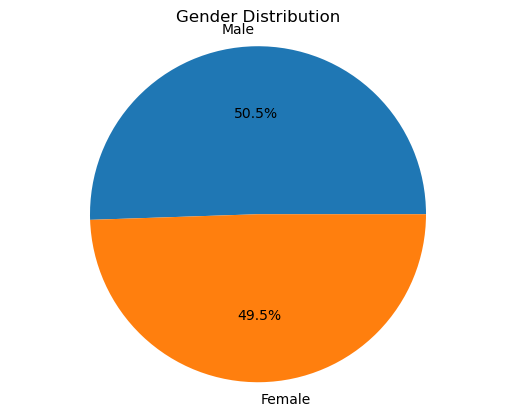

In [1627]:
Gender_count= df["Gender"].value_counts().reset_index()
Gender_count
plt.pie(Gender_count["count"], labels=Gender_count["Gender"], autopct='%1.1f%%')
plt.axis("equal")
plt.title("Gender Distribution")
plt.show()

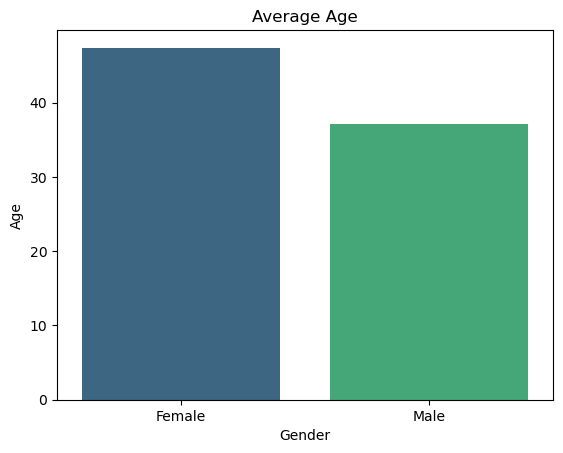

In [1628]:
Age_mean= df.groupby("Gender")["Age"].mean().reset_index()
Age_mean
sns.barplot(data=Age_mean, x="Gender", y="Age", hue="Gender", palette='viridis')
plt.title("Average Age")
plt.show()

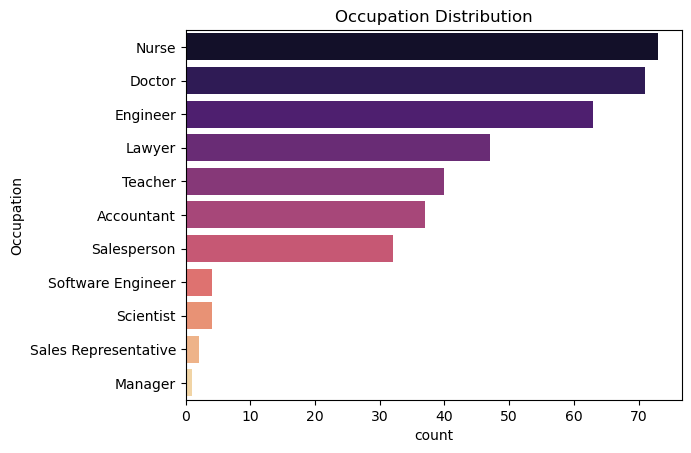

In [1629]:
Job_count= df["Occupation"].value_counts().reset_index()
Job_count
sns.barplot(data= Job_count, x= "count", y= "Occupation", hue="Occupation", palette='magma')
plt.title("Occupation Distribution")
plt.show()

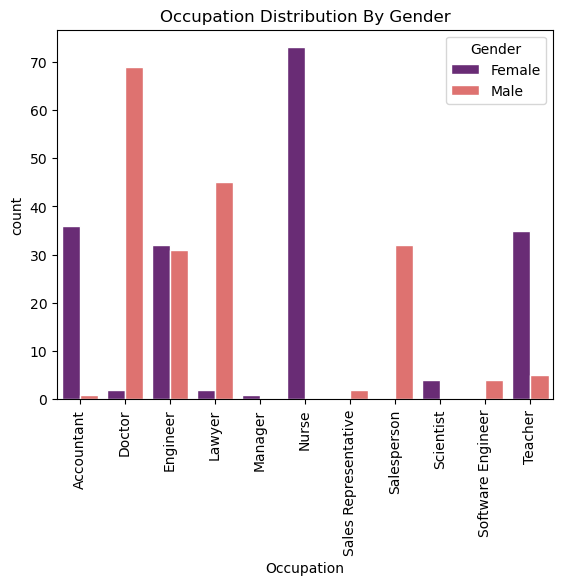

In [1630]:
occ_count_melt= pd.crosstab(df["Occupation"], df["Gender"]).reset_index().melt(id_vars= "Occupation", var_name= "Gender", value_name="count")
sns.barplot(data= occ_count_melt, x= "Occupation", y= "count", hue= "Gender", edgecolor="white", palette= 'magma')
plt.xticks(rotation= 90)
plt.title("Occupation Distribution By Gender")
plt.show()

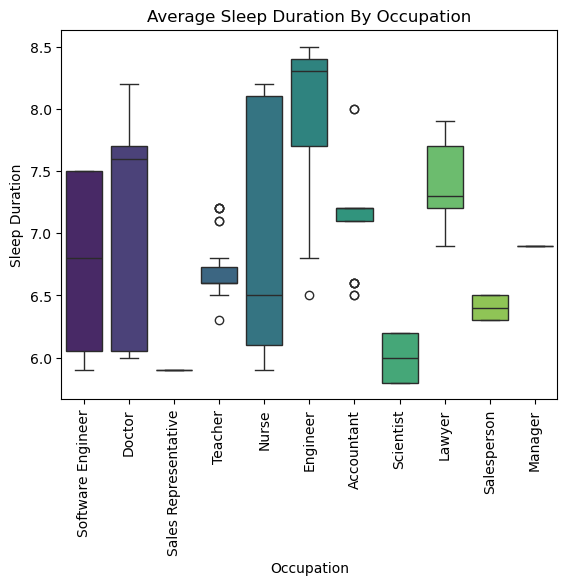

In [1631]:
sns.boxplot(data= df, x= "Occupation", y= "Sleep Duration", hue= "Occupation" , palette= 'viridis')
plt.xticks(rotation= 90)
plt.title("Average Sleep Duration By Occupation")
plt.show()

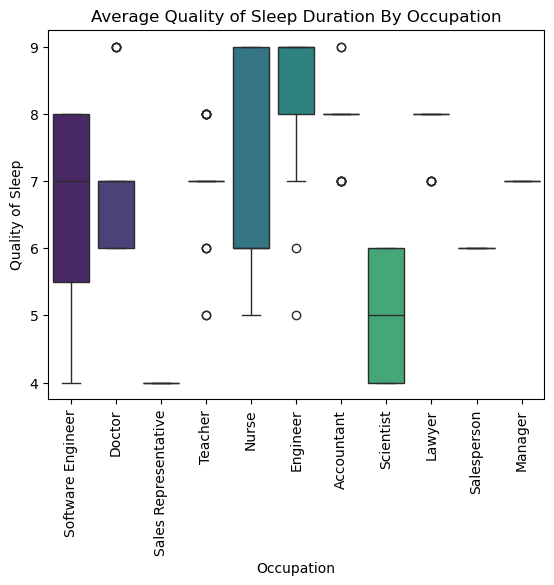

In [1632]:
sns.boxplot(data= df, x= "Occupation", y= "Quality of Sleep", hue= "Occupation" , palette= 'viridis')
plt.xticks(rotation= 90)
plt.title("Average Quality of Sleep Duration By Occupation")
plt.show()

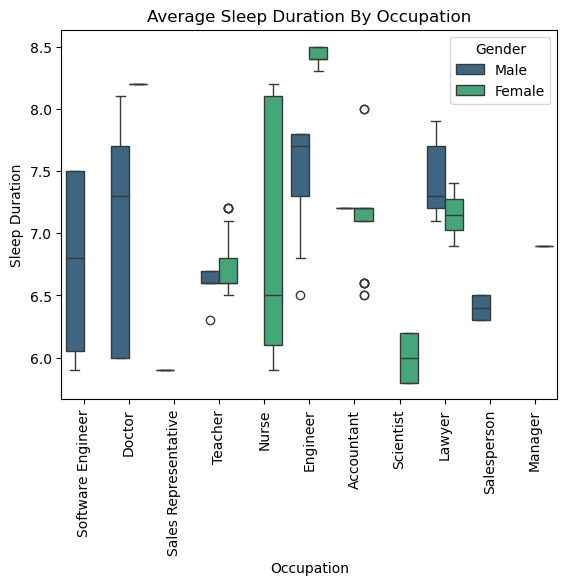

In [1633]:
sns.boxplot(data= df, x= "Occupation", y= "Sleep Duration", hue= "Gender" , palette= 'viridis')
plt.xticks(rotation= 90)
plt.title("Average Sleep Duration By Occupation")
plt.show()

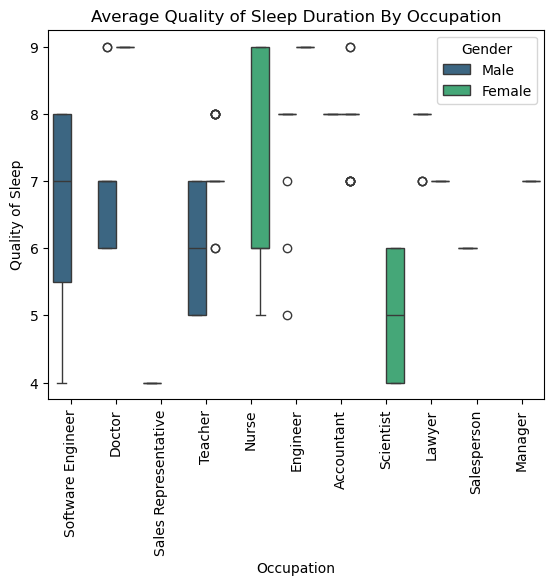

In [1634]:
sns.boxplot(data= df, x= "Occupation", y= "Quality of Sleep", hue= "Gender" , palette= 'viridis')
plt.xticks(rotation= 90)
plt.title("Average Quality of Sleep Duration By Occupation")
plt.show()

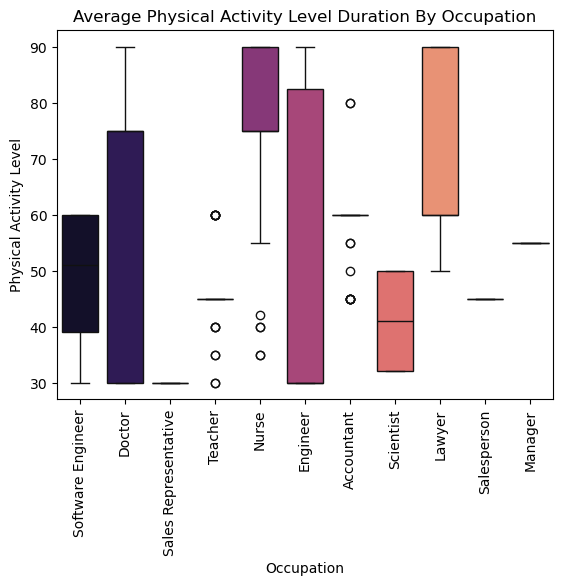

In [1732]:
sns.boxplot(data= df, x="Occupation", y="Physical Activity Level", hue="Occupation", palette="magma")
plt.xticks(rotation= 90)
plt.title("Average Physical Activity Level Duration By Occupation")
plt.show()

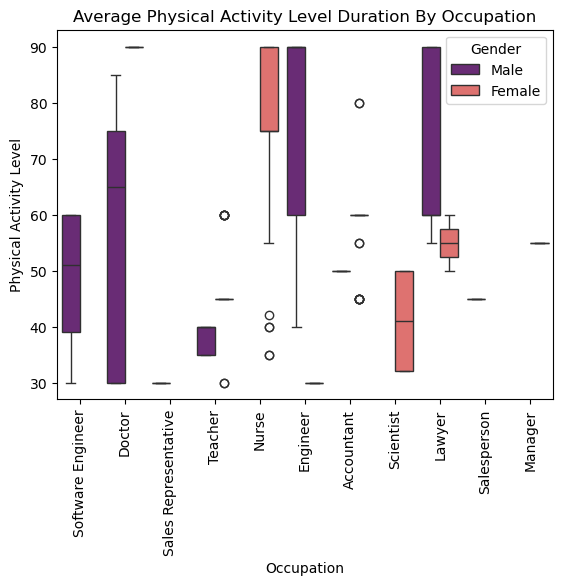

In [1734]:
sns.boxplot(data= df, x="Occupation", y="Physical Activity Level", hue="Gender", palette="magma")
plt.xticks(rotation= 90)
plt.title("Average Physical Activity Level Duration By Occupation")
plt.show()

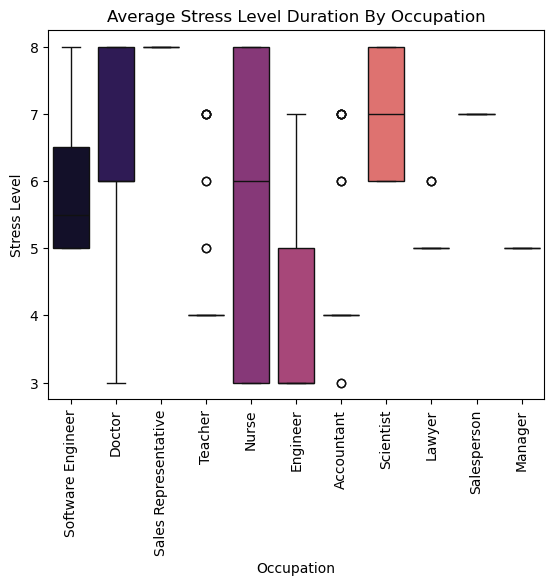

In [1738]:
sns.boxplot(data= df, x="Occupation", y="Stress Level", hue="Occupation", palette="magma")
plt.xticks(rotation= 90)
plt.title("Average Stress Level Duration By Occupation")
plt.show()

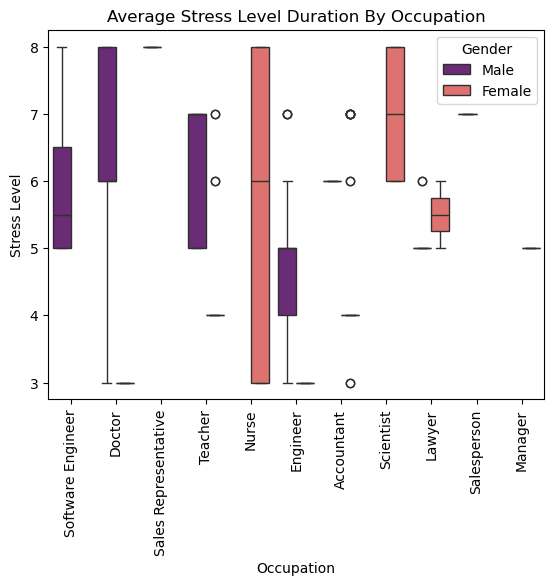

In [1740]:
sns.boxplot(data= df, x="Occupation", y="Stress Level", hue="Gender", palette="magma")
plt.xticks(rotation= 90)
plt.title("Average Stress Level Duration By Occupation")
plt.show()

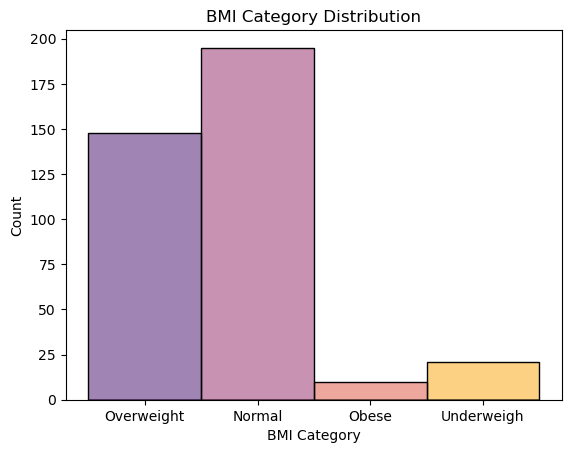

In [1768]:
sns.histplot(data= df, x= "BMI Category", hue= "BMI Category", palette= "inferno", legend=False)
plt.title("BMI Category Distribution")
plt.show()

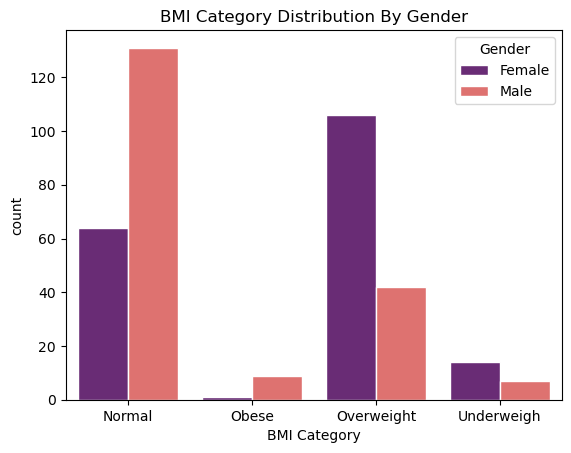

In [1830]:
bmiGenderMelt= pd.crosstab(df["BMI Category"], df["Gender"]).reset_index().melt(id_vars= "BMI Category", var_name= "Gender", value_name= "count")
sns.barplot(data= bmiGenderMelt, x= "BMI Category", y= "count", hue= "Gender", palette= "magma", edgecolor="white")
plt.title("BMI Category Distribution By Gender")
plt.show()

In [1904]:
bm_oc= pd.pivot_table(df, index="Occupation", columns="BMI Category", aggfunc= "size", fill_value=0)
bm_oc

BMI Category,Normal,Obese,Overweight,Underweigh
Occupation,,,,
Accountant,26,0,6,5
Doctor,65,4,0,2
Engineer,56,0,3,4
Lawyer,42,2,2,1
Manager,0,0,1,0
Nurse,0,0,66,7
Sales Representative,0,2,0,0
Salesperson,0,0,32,0
Scientist,0,0,4,0


In [1910]:
bm_oc1= bm_oc.reset_index().melt(id_vars="Occupation", var_name="BMI Category", value_name="count")
bm_oc1

,Occupation,BMI Category,count
0,Accountant,Normal,26
1,Doctor,Normal,65
2,Engineer,Normal,56
3,Lawyer,Normal,42
4,Manager,Normal,0
5,Nurse,Normal,0
6,Sales Representative,Normal,0
7,Salesperson,Normal,0
8,Scientist,Normal,0
9,Software Engineer,Normal,0


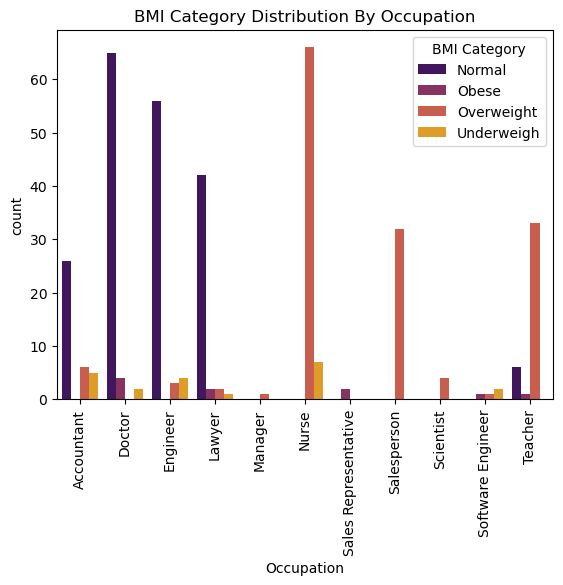

In [1944]:
sns.barplot(data= bm_oc1, x= "Occupation", y= "count", hue="BMI Category", palette="inferno")
plt.xticks(rotation= 90)
plt.title("BMI Category Distribution By Occupation")
plt.show()